# **Data Science Track: Course 14**
# **Exploratory Data Analysis Part-1**# 

# Chap 1: Graphical EDA

### Plotting a histogram

In [1]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
from bokeh.sampledata.iris import flowers as df

In [2]:
# US Swing States
df_swing = pd.read_csv('datasets/2008_swing_states.csv')
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [3]:
df_all_states = pd.read_csv('datasets/2008_all_states.csv')
df_all_states.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


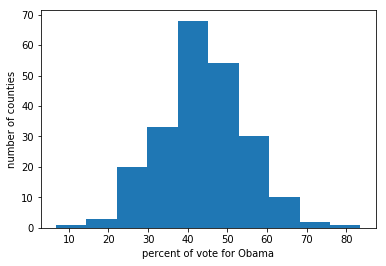

In [4]:
_ = plt.hist(df_swing['dem_share'])
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

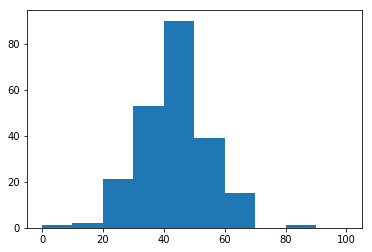

In [5]:
bin_edges = [0,10,20,30,40,50,
             60,70,80,90,100]
_ = plt.hist(df_swing['dem_share'], bins=bin_edges)
plt.show()

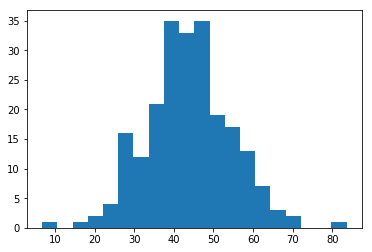

In [6]:
_ = plt.hist(df_swing['dem_share'], bins=20)
plt.show()

In [7]:
# EXERCISE

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


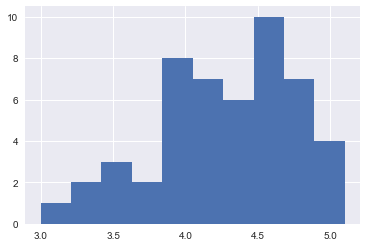

In [9]:
# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
versicolor_petal_length = df[df.species=='versicolor']['petal_length']
plt.hist(versicolor_petal_length)

# Show histogram
plt.show()

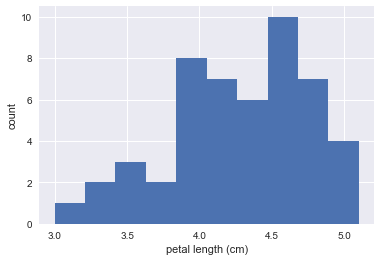

In [10]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()


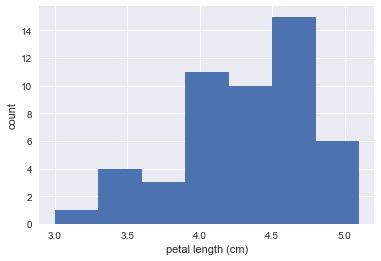

In [11]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

### BEE SWARM PLOTS

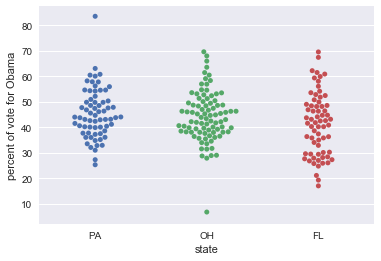

In [12]:
sns.swarmplot(x='state',y='dem_share',data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

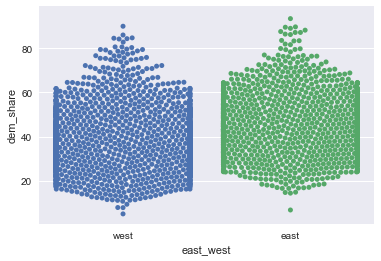

In [13]:
sns.swarmplot(x='east_west',y='dem_share',data=df_all_states)
plt.show()

In [14]:
# EXERCISE

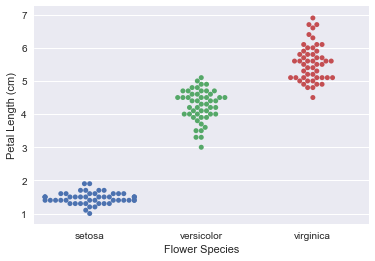

In [15]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='species',y='petal_length',data=df)

# Label the axes
plt.xlabel('Flower Species')
plt.ylabel('Petal Length (cm)')

# Show the plot
plt.show()

### ECDFs

In [16]:
# Empirical cumulative distribution functions

In [17]:
x=np.sort(df_swing['dem_share'])

In [18]:
y=np.arange(1,len(x)+1)/len(x)

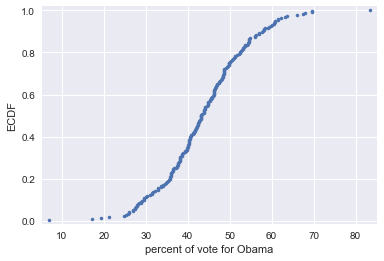

In [19]:
_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

In [20]:
dem_share_PA = np.sort(df_swing['dem_share'][df_swing.state=='PA'])
dem_share_OH = np.sort(df_swing['dem_share'][df_swing.state=='OH'])
dem_share_FL = np.sort(df_swing['dem_share'][df_swing.state=='FL'])

In [21]:
y1=np.arange(1,len(dem_share_PA)+1)/len(dem_share_PA)
y2=np.arange(1,len(dem_share_OH)+1)/len(dem_share_OH)
y3=np.arange(1,len(dem_share_FL)+1)/len(dem_share_FL)

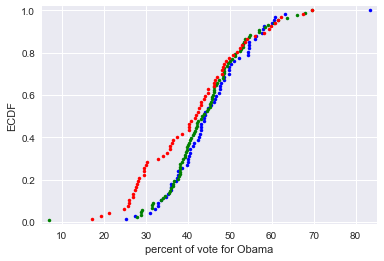

In [22]:
_ = plt.plot(dem_share_PA,y1,marker='.',linestyle='none',color='blue')
_ = plt.plot(dem_share_OH,y2,marker='.',linestyle='none',color='green')
_ = plt.plot(dem_share_FL,y3,marker='.',linestyle='none',color='red')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDF')
_ = plt.legend(loc='lower right')
plt.margins(0.02)
plt.show()

In [23]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

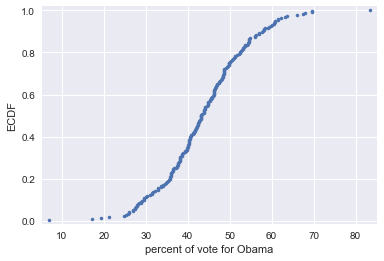

In [24]:
a,b = ecdf(df_swing['dem_share'])
_ = plt.plot(a,b,marker='.',linestyle='none')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

In [25]:
# EXERCISE

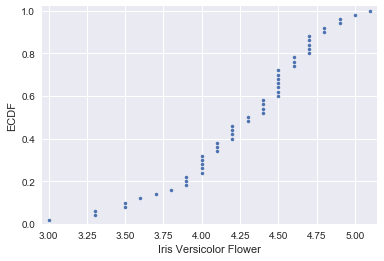

In [26]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers,y_vers,marker='.',linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Iris Versicolor Flower')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()


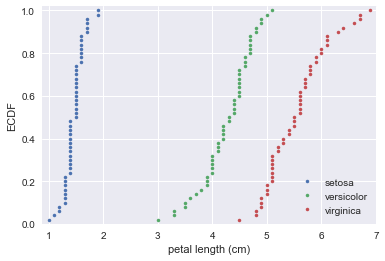

In [27]:
setosa_petal_length = df[df.species=='setosa']['petal_length']
versicolor_petal_length = df[df.species=='versicolor']['petal_length']
virginica_petal_length = df[df.species=='virginica']['petal_length']

# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set,y_set,marker='.',linestyle='none')
_ = plt.plot(x_vers,y_vers,marker='.',linestyle='none')
_ = plt.plot(x_virg,y_virg,marker='.',linestyle='none')

# Make nice margins
plt.margins(0.02)

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

# Chap 2: Quantitative EDA

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Summary Statistics

In [29]:
dem_share_PA = np.sort(df_swing['dem_share'][df_swing.state=='PA'])
dem_share_OH = np.sort(df_swing['dem_share'][df_swing.state=='OH'])
dem_share_FL = np.sort(df_swing['dem_share'][df_swing.state=='FL'])

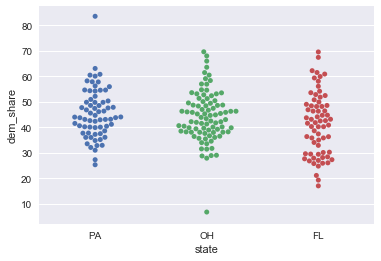

In [30]:
sns.swarmplot(x='state',y='dem_share',data=df_swing)
plt.show()

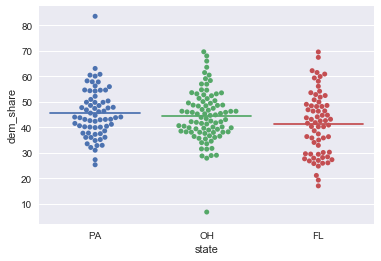

In [31]:
px = sns.swarmplot(x='state',y='dem_share',data=df_swing)
px.plot([-0.4,0.4],
        [np.mean(dem_share_PA),
         np.mean(dem_share_PA)])
px.plot([0.6,1.4],
        [np.mean(dem_share_OH),
         np.mean(dem_share_OH)])
px.plot([1.6,2.4],
        [np.mean(dem_share_FL),
         np.mean(dem_share_FL)])
plt.show()

In [32]:
np.mean(dem_share_PA)

45.476417910447758

In [33]:
dem_share_UT = df_all_states.loc[df_all_states.state=='UT']
dem_share_UT.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
804,UT,Cache County,41332,10294,29127,1911,26.12,west
806,UT,Rich County,1006,154,831,21,15.64,west
809,UT,Box Elder County,19058,3311,15228,519,17.86,west
917,UT,Weber County,73394,25666,45885,1843,35.87,west
931,UT,Morgan County,4161,689,3311,161,17.23,west


In [34]:
UT_mean = np.mean(dem_share_UT.dem_share)
UT_median = np.median(dem_share_UT.dem_share)
print(UT_mean, UT_median)

27.61103448275862 22.47


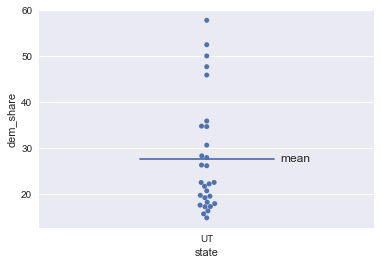

In [35]:
px = sns.swarmplot(x='state',y='dem_share',data=dem_share_UT);
px.plot([-0.2,0.2],[UT_mean,UT_mean])
px.text(0.22,UT_mean-0.5,'mean')
plt.show()

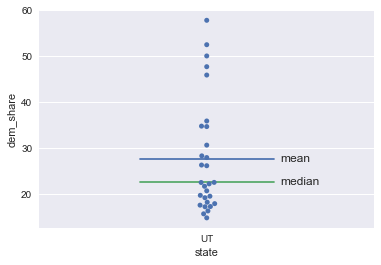

In [36]:
px = sns.swarmplot(x='state',y='dem_share',data=dem_share_UT);
px.plot([-0.2,0.2],[UT_mean,UT_mean])
px.text(0.22,UT_mean-0.5,'mean')
px.plot([-0.2,0.2],[UT_median,UT_median])
px.text(0.22,UT_median-0.5,'median')
plt.show()

### Percentiles, outliers, box plots

In [37]:
np.percentile(df_swing['dem_share'], [25, 50, 75])

array([ 37.3025,  43.185 ,  49.925 ])

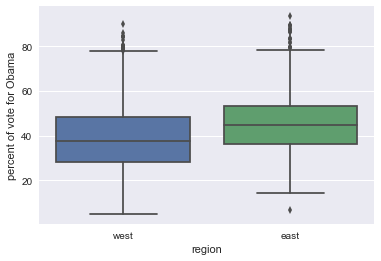

In [38]:
_ = sns.boxplot(x='east_west', y='dem_share',data=df_all_states)
_ = plt.xlabel('region')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

In [39]:
# EXERCISE

In [40]:
# Computing percentiles
# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length,percentiles)

# Print the result
print(ptiles_vers)

[ 3.3     4.      4.35    4.6     4.9775]


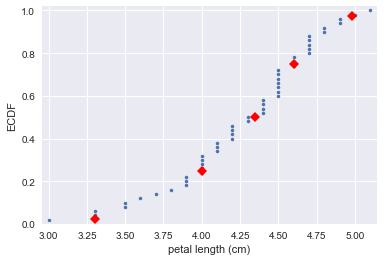

In [41]:
# Comparing Percentiles to ECDF
_ = plt.plot(x_vers, y_vers, '.')
plt.margins(0.02)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

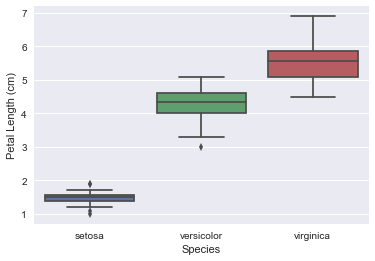

In [42]:
# Box-and-whisker plot
# Create box plot with Seaborn's default settings
sns.set()
sns.boxplot(x='species',y='petal_length',data=df)

# Label the axes
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')

# Show the plot
plt.show()

### VARIANCE AND STANDARD DEVIATION

In [43]:
np.var(dem_share_FL)

147.44278618846067

In [44]:
np.std(dem_share_FL), np.sqrt(np.var(dem_share_FL))

(12.142602117687158, 12.142602117687158)

In [45]:
# EXERCISE

In [46]:
# Computing the Variance
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences ** 2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000012 0.21640000000000012


In [47]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.465188133985
0.4651881339845204


### Covariance and Pearson correlation coefficient

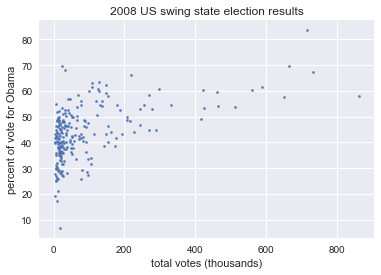

In [48]:
sns.set()
plt.scatter(x=df_swing['total_votes']/1000,y='dem_share',data=df_swing,
            s=20,marker='.')
plt.xlabel('total votes (thousands)')
plt.ylabel('percent of vote for Obama')
plt.title('2008 US swing state election results')
plt.show()

In [49]:
# EXERCISE
# Scatter Plot

In [50]:
versicolor_petal_length = df[df.species=='versicolor']['petal_length']
versicolor_petal_width = df[df.species=='versicolor']['petal_width']

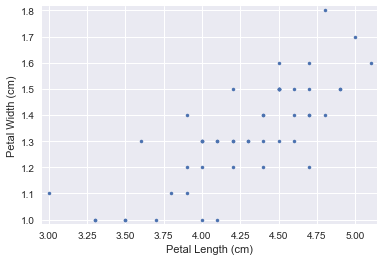

In [51]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length,versicolor_petal_width,
             marker='.',linestyle='none')

# Set margins
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Petal Length (cm)')
_ = plt.ylabel('Petal Width (cm)')

# Show the result
plt.show()

In [52]:
# Computing the Covariance

In [53]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[ 0.22081633  0.07310204]
 [ 0.07310204  0.03910612]]
0.0731020408163


In [54]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length,versicolor_petal_width)

# Print the result
print(r)


0.786668088523


# Chap 3:  
# Discrete variables - Probability

### Random number generators

In [55]:
import numpy as np

In [56]:
# Simulating 4 coin flips
np.random.seed(42)
random_numbers = np.random.random(size=4)
random_numbers

array([ 0.37454012,  0.95071431,  0.73199394,  0.59865848])

In [57]:
heads = random_numbers < 0.5
heads

array([ True, False, False, False], dtype=bool)

In [58]:
np.sum(heads)

1

In [59]:
n_all_heads = 0 # Initialize number of 4-heads trials
for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1

In [60]:
n_all_heads / 10000

0.0619

In [61]:
# EXERCISE

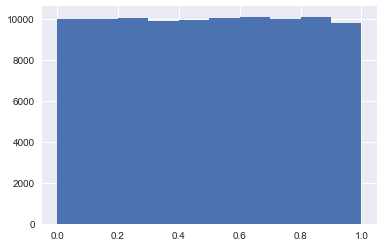

In [62]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

In [63]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0


    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

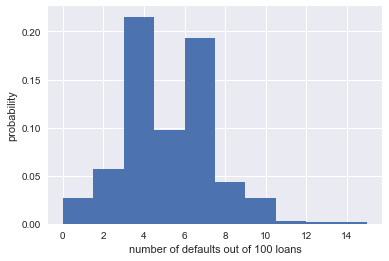

In [64]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

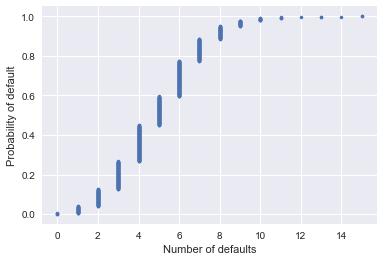

Probability of losing money = 0.022


In [65]:
# Will the bank fail?
# Compute ECDF: x, y
x,y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('Number of defaults')
plt.ylabel('Probability of default')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


### Binomial distribution

In [66]:
np.random.binomial(4, 0.5)

2

In [67]:
np.random.binomial(4, 0.5, size=10)

array([2, 2, 2, 2, 2, 3, 3, 2, 2, 0])

In [68]:
# Binomial PMF
samples = np.random.binomial(60, 0.1, size=10000)
samples

array([9, 4, 6, ..., 5, 2, 7])

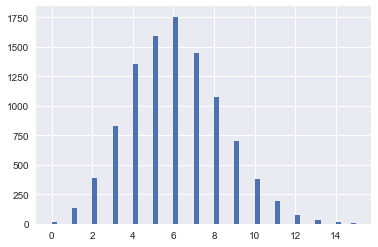

In [69]:
sns.set()
plt.hist(samples,bins=60)
plt.show()

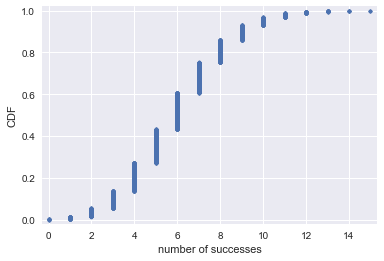

In [70]:
# Binomial CDF
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
x, y = ecdf(samples)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('number of successes')
_ = plt.ylabel('CDF')
plt.show()

In [71]:
# EXERCISE

In [72]:
np.random.seed(42)

In [73]:
# Sampling out of the Binomial distribution
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100,p=0.05,size=10000)

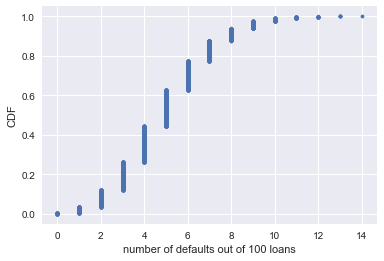

In [74]:
# Compute CDF: x, y
x,y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x,y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

In [75]:
# Plotting the Binomial PMF

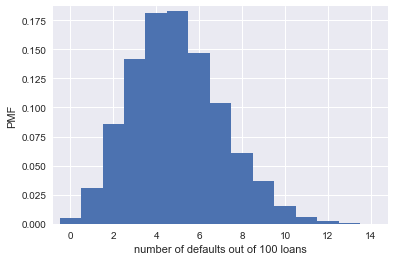

In [76]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, bins=bins, normed=True)

# Set margins
plt.margins(0.02)

# Label axes
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('PMF')

# Show the plot
plt.show()

### Poisson Distribution

In [77]:
samples = np.random.poisson(6, size=10000)
samples

array([6, 8, 1, ..., 7, 5, 5])

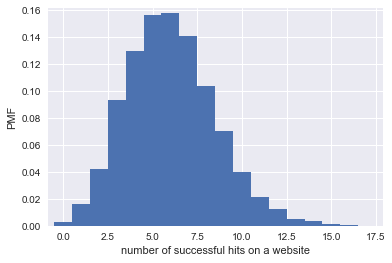

In [78]:
# Compute bin edges: bins
bins = np.arange(0, max(samples) + 1.5) - 0.5

# Generate histogram
plt.hist(samples, bins=bins, normed=True)

# Set margins
plt.margins(0.02)

# Label axes
_ = plt.xlabel('number of successful hits on a website')
_ = plt.ylabel('PMF')

# Show the plot
plt.show()

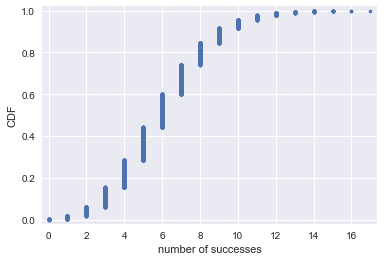

In [79]:
x, y = ecdf(samples)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('number of successes')
_ = plt.ylabel('CDF')
plt.show()

In [80]:
# Relationship between Binomial and Poisson Distributions

# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10,size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n=n[i],p=p[i],size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      10.0421 3.17183347451
n = 20 Binom: 10.0064 2.24765634384
n = 100 Binom: 9.9371 2.98009120498
n = 1000 Binom: 10.0357 3.16430490155


In [81]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115,size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0072


# Chap 4:  
# Continuous variables - Probability

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Normal distribution

In [83]:
# Checking Normality of Michelson data 
michelson_speed_of_light = pd.read_csv('datasets/michelson_speed_of_light.csv',index_col=0)
michelson_speed_of_light = michelson_speed_of_light['velocity of light in air (km/s)']

In [84]:
mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light)
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(michelson_speed_of_light)
x_theor, y_theor = ecdf(samples)

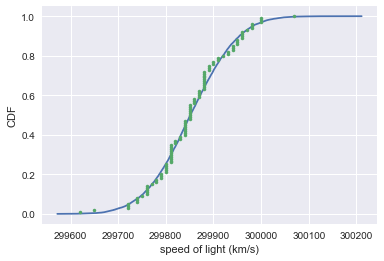

In [85]:
sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('speed of light (km/s)')
_ = plt.ylabel('CDF')
plt.show()

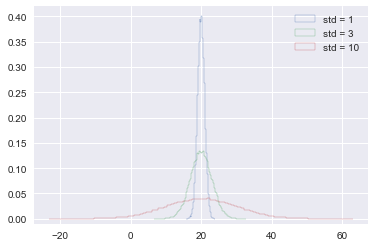

In [86]:
# EXERCISE
# The Normal PDF
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20,1,100000)
samples_std3 = np.random.normal(20,3,100000)
samples_std10 = np.random.normal(20,10,100000)

# Make histograms
_ = plt.hist(samples_std1, bins=100, normed=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, normed=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, normed=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

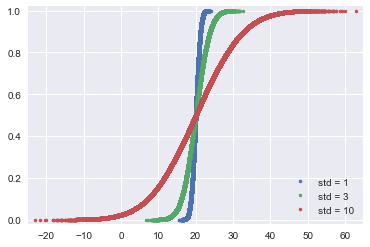

In [87]:
# The Normal CDF
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

### Normal distribution: Properties and warnings

In [88]:
# Are the Belmont Stakes results Normally distributed?

In [89]:
d = (pd.read_csv('datasets/belmont.csv',usecols=['Time']))
belmont_no_outliers = (pd.to_datetime(d['Time'],format='%M:%S.%f') - pd.to_datetime('1900-01-01')).dt.total_seconds()

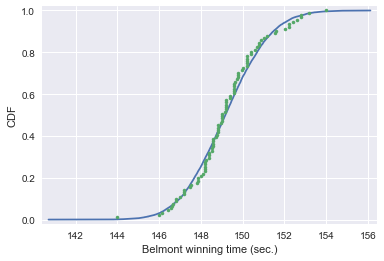

In [90]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

In [91]:
# What are the chances of a horse matching or beating Secretariat's record?

In [92]:
np.random.seed(42)
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.001542


### Exponential distribution

In [93]:
# Exponential inter-incident times

In [94]:
inter_times = np.random.poisson(1,10000) # DATA NOT CORRECT
inter_times

array([0, 3, 1, ..., 1, 1, 0])

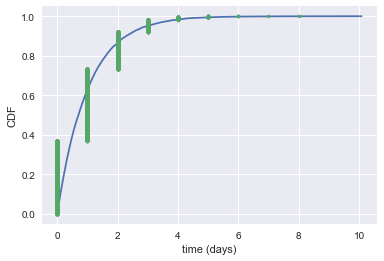

In [95]:
mean = np.mean(inter_times)
samples = np.random.exponential(mean, size=10000)
x, y = ecdf(inter_times)
x_theor, y_theor = ecdf(samples)
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('time (days)')
_ = plt.ylabel('CDF')
plt.show()

In [96]:
# EXERCISE
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

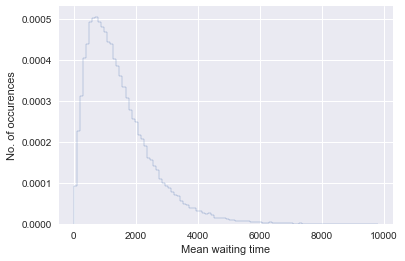

In [97]:
# Distribution of no-hitters and cycles
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(tau1=764,tau2=715,size=100000)

# Make the histogram
plt.hist(waiting_times, bins=100, normed=True, histtype='step')

# Label axes
plt.xlabel('Mean waiting time')
plt.ylabel('No. of occurences')

# Show the plot
plt.show()

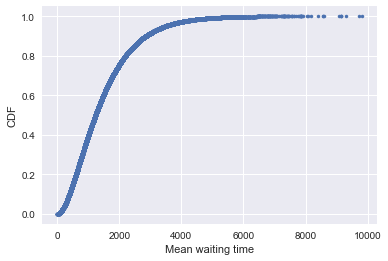

In [98]:
x, y = ecdf(data=waiting_times)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Mean waiting time')
_ = plt.ylabel('CDF')
plt.show()